In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#warnings removal
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#ml model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#data reading
customerchurn = pd.read_csv("CodSoft internship tasks/Task 3/Churn_Modelling.csv")

In [3]:
customerchurn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#data exploration
customerchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
customerchurn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
customerchurn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
customerchurn['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [17]:
customerchurn['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [9]:
customerchurn['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [10]:
unique_ages = sorted(customerchurn['Age'].unique())

print("Unique ages in the dataset, sorted in ascending order:")
print(unique_ages)

Unique ages in the dataset, sorted in ascending order:
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 92]


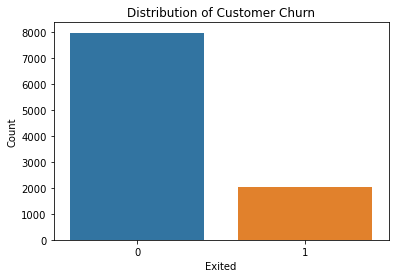

In [11]:
#distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=customerchurn, x='Exited')
plt.title('Distribution of Customer Churn')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

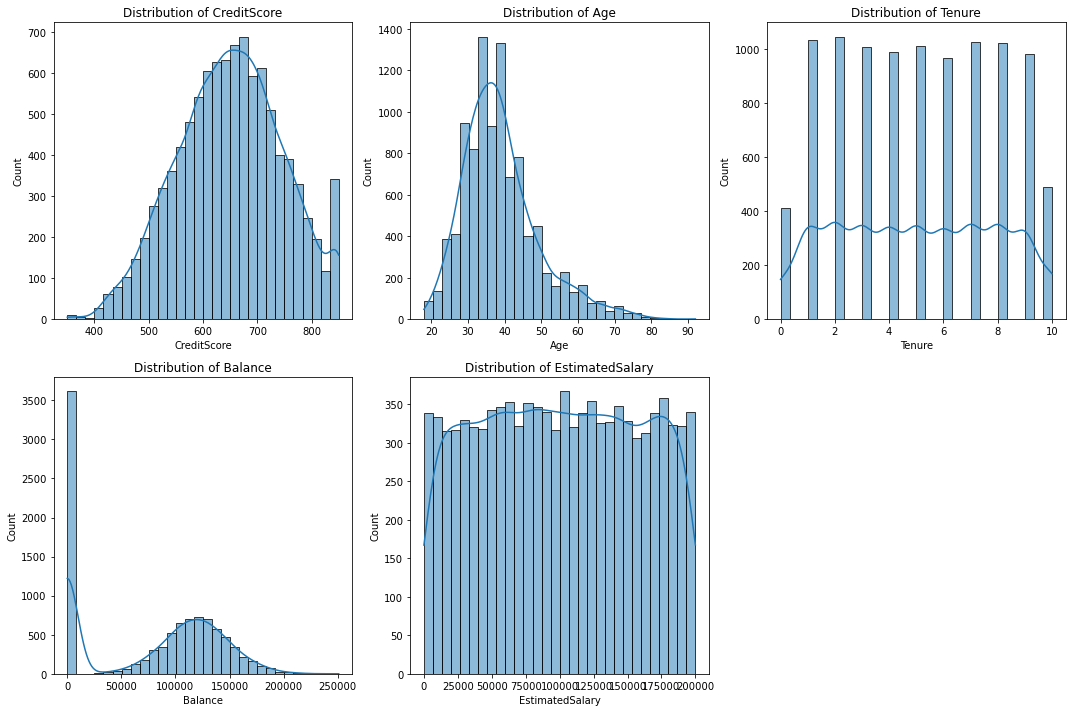

In [10]:
#distributions of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(customerchurn[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

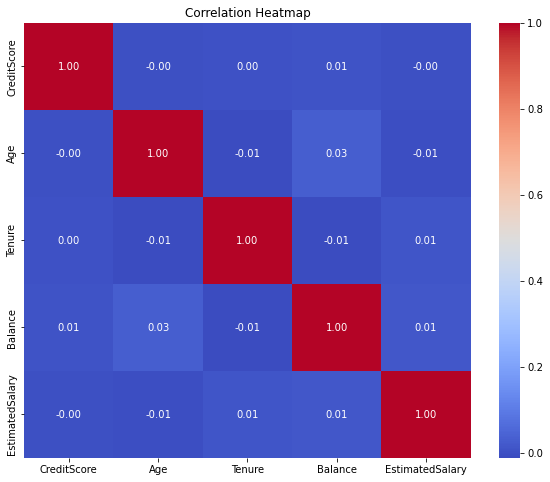

In [13]:
#correlation matrix
corr = customerchurn[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

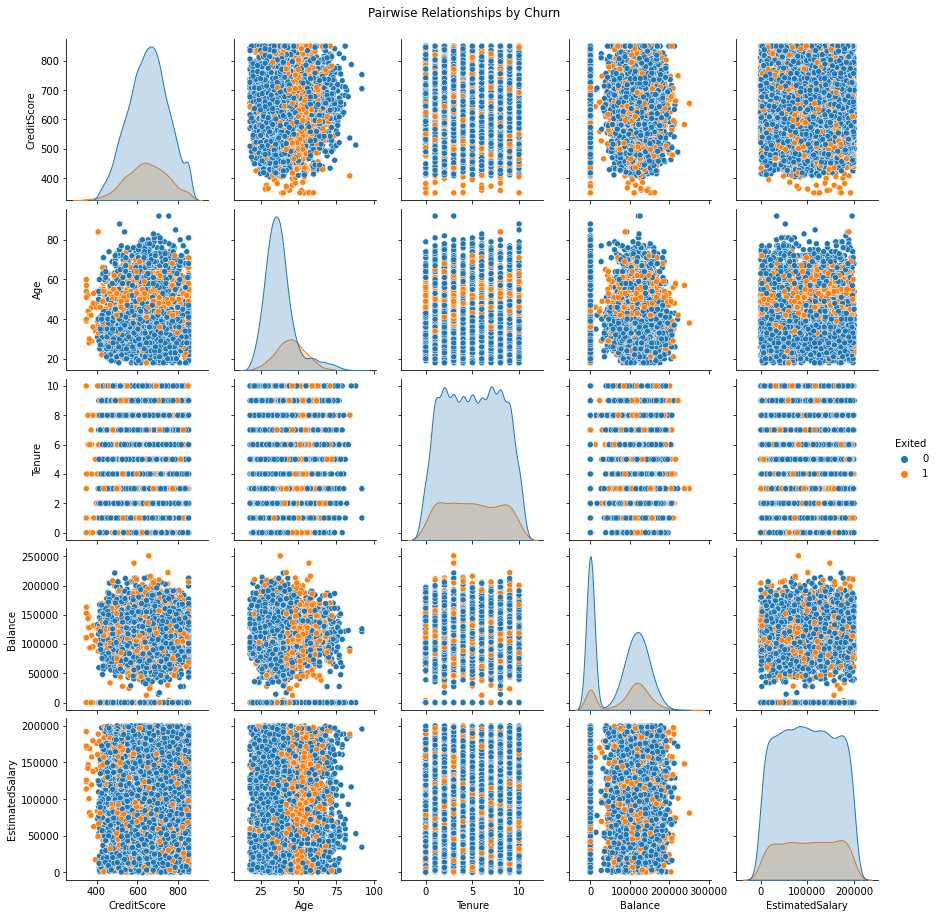

In [14]:
#pairplot for numerical features colored by churn status
sns.pairplot(customerchurn, hue='Exited', vars=numerical_features)
plt.suptitle('Pairwise Relationships by Churn', y=1.02)
plt.show()

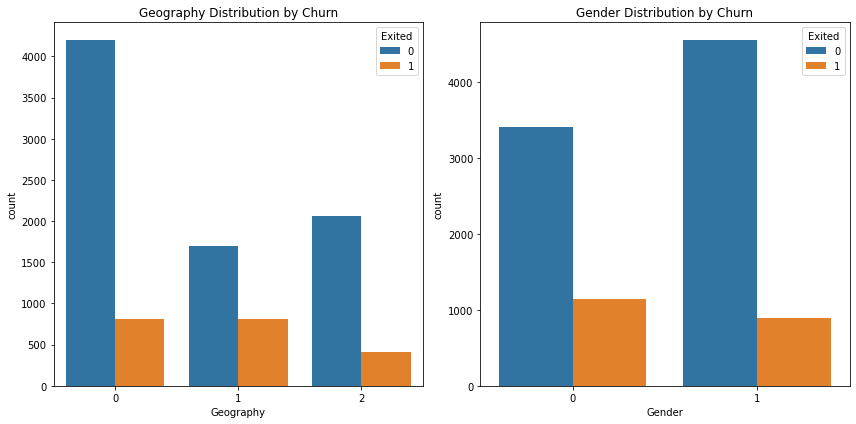

In [45]:
#distribution of categorical features
categorical_features = ['Geography', 'Gender']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=customerchurn, x=feature, hue='Exited')
    plt.title(f'{feature} Distribution by Churn')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [12]:
#data cleaning
customerchurn = customerchurn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
customerchurn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
#encoding 'Geography' and 'Gender'
le_geo = LabelEncoder()
le_gen = LabelEncoder()

customerchurn['Geography'] = le_geo.fit_transform(customerchurn['Geography'])
customerchurn['Gender'] = le_gen.fit_transform(customerchurn['Gender'])

In [14]:
customerchurn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [15]:
#scaling Balance and EstimatedSalary
scaler = StandardScaler()

features_to_scale = ['Balance', 'EstimatedSalary']

customerchurn[features_to_scale] = scaler.fit_transform(customerchurn[features_to_scale])

In [16]:
customerchurn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,608,2,0,41,1,0.117350,1,0,1,0.216534,0
2,502,0,0,42,8,1.333053,3,1,0,0.240687,1
3,699,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,850,2,0,43,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,-1.225848,2,1,0,-0.066419,0
9996,516,0,1,35,10,-0.306379,1,1,1,0.027988,0
9997,709,0,0,36,7,-1.225848,1,0,1,-1.008643,1
9998,772,1,1,42,3,-0.022608,2,1,0,-0.125231,1


In [19]:
#fit and transform the scaler on CreditScore
customerchurn[['CreditScore']] = scaler.fit_transform(customerchurn[['CreditScore']])

In [20]:
customerchurn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,39,5,-1.225848,2,1,0,-0.066419,0
9996,-1.391939,0,1,35,10,-0.306379,1,1,1,0.027988,0
9997,0.604988,0,0,36,7,-1.225848,1,0,1,-1.008643,1
9998,1.256835,1,1,42,3,-0.022608,2,1,0,-0.125231,1


In [21]:
#separating features and the target variable.
x = customerchurn.drop('Exited', axis=1)
y = customerchurn['Exited']

In [22]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [24]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9069,-0.326221,2,0,32,4,1.585405,2,1,1,1.264218
2603,-0.077899,1,0,34,7,1.345318,1,0,1,1.537933
7738,-0.926334,0,1,33,6,-1.225848,2,0,0,1.279659
1579,-0.336568,1,1,41,8,-0.621581,1,1,1,1.663871
5058,0.656722,0,1,37,9,1.153648,2,0,1,0.890155
...,...,...,...,...,...,...,...,...,...,...
5734,1.215448,0,1,54,8,-0.108554,1,1,1,-0.534002
5191,0.325625,0,0,58,1,-1.225848,1,1,1,-1.728184
5390,0.874005,0,0,38,1,-1.225848,3,0,0,-0.136854
860,0.170424,0,1,43,8,1.822949,1,1,0,-0.044902


In [25]:
#logestsic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
#prediction and evaluation on test set
y_pred = log_reg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression
Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.60      0.17      0.27       584

    accuracy                           0.82      3000
   macro avg       0.72      0.57      0.58      3000
weighted avg       0.79      0.82      0.77      3000



In [27]:
#predicting on the training set
y_train_pred = log_reg.predict(x_train)

print("Logistic Regression - Training Accuracy:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Logistic Regression - Training Accuracy:
Accuracy: 0.8045714285714286
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5547
           1       0.59      0.19      0.28      1453

    accuracy                           0.80      7000
   macro avg       0.71      0.58      0.58      7000
weighted avg       0.77      0.80      0.76      7000



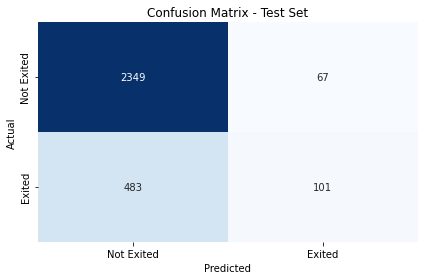

In [29]:
#confusion Matrix for test Set
test_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [30]:
#a manual test on the model using a new customer example
#a sample customer data point
new_customer = pd.DataFrame({
    'CreditScore': [650],
    'Geography': ['France'],
    'Gender': ['Male'],
    'Age': [35],
    'Tenure': [3],
    'Balance': [50000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [60000]
})

In [32]:
#encoding the customer's 'Geography' and 'Gender'
le_geography = LabelEncoder()
le_gender = LabelEncoder()

le_geography.fit(new_customer['Geography'])
le_gender.fit(new_customer['Gender'])

new_customer['Geography'] = le_geography.transform(new_customer['Geography'])
new_customer['Gender'] = le_gender.transform(new_customer['Gender'])

In [33]:
#making sure all feature columns match those used in training
expected_columns = x_train.columns
new_customer = new_customer.reindex(columns=expected_columns, fill_value=0)

In [34]:
new_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,650,0,0,35,3,50000,2,1,1,60000


In [35]:
#predicting churn
predicted_churn = log_reg.predict(new_customer)
predicted_prob = log_reg.predict_proba(new_customer)[:, 1]  #probability of churn

print("Predicted Churn (0: No, 1: Yes):", predicted_churn[0])
print("Probability of Churn:", predicted_prob[0])

Predicted Churn (0: No, 1: Yes): 1
Probability of Churn: 1.0


In [36]:
#random forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
y_predrf = rf.predict(x_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_predrf))
print(classification_report(y_test, y_predrf))

Random Forest
Accuracy: 0.8676666666666667
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.76      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [39]:
#predicting on the training set
y_train_predrf = rf.predict(x_train)

print("Random Forest - Training Accuracy:")
print("Accuracy:", accuracy_score(y_train, y_train_predrf))
print(classification_report(y_train, y_train_predrf))

Random Forest - Training Accuracy:
Accuracy: 0.9998571428571429
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5547
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



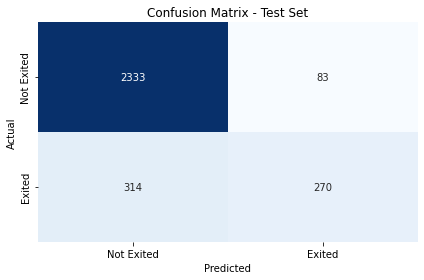

In [40]:
#confusion Matrix for test Set
test_cmrf = confusion_matrix(y_test, y_predrf)
sns.heatmap(test_cmrf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [41]:
#gradient boosting model
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [42]:
y_predgb = gb.predict(x_test)

print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_predgb))
print(classification_report(y_test, y_predgb))

Gradient Boosting
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.86      3000



In [43]:
#predicting on the training set
y_train_predgb = gb.predict(x_train)

print("Gradient Boosting - Training Accuracy:")
print("Accuracy:", accuracy_score(y_train, y_train_predgb))
print(classification_report(y_train, y_train_predgb))

Gradient Boosting - Training Accuracy:
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5547
           1       0.81      0.48      0.61      1453

    accuracy                           0.87      7000
   macro avg       0.85      0.73      0.76      7000
weighted avg       0.86      0.87      0.86      7000



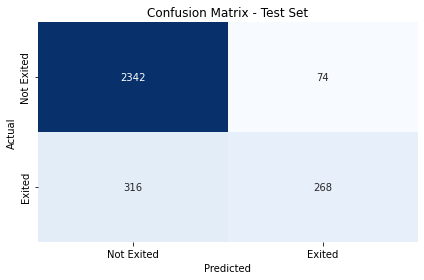

In [44]:
#confusion Matrix for test Set
test_cmgb = confusion_matrix(y_test, y_predgb)
sns.heatmap(test_cmgb, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()